In [1]:
import numpy as np
import nengo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nni
import pickle
import json
from model import Inputs, build_network, run_once

In [2]:
def run_all_trials(args, deltaPs=[0.1, 0.2, 0.4]):
    # each participant has a participant ID (a long string) and an associated "pid" (integer) in the database
    # load this data to compute the loss between simulated and model behavior
    with open('data/pids.pkl', 'rb') as f:
        pids = pickle.load(f)
    pid = args['pid']
    participant_ID = pids[pid]
    dfs = []
    columns = ('agent', 'dP', 'trial', 'cues', 'correct')
    for dP in deltaPs:
        empirical = pd.read_pickle("data/empirical.pkl").query("maxSamples==12 & delta==@dP & participant_id==@participant_ID")
        empirical_cues = empirical['cues'].to_numpy()
        empirical_accuracy = empirical['correct'].to_numpy()
        nTrials = empirical.shape[0]
        
        simulated_cues = []
        simulated_accuracy = []
        for trial in range(nTrials):
            is_correct, cues_sampled = run_once(deltaP=0.1, empirical=empirical, trial=trial,
                        T=args['T'], m=args["m"], tau=args["tau"], delta=args["delta"], seed=args["pid"])
            dfs.append(pd.DataFrame([['model', dP, trial, cues_sampled, 1.0*is_correct,]], columns=columns))
            dfs.append(pd.DataFrame([['human', dP, trial, empirical_cues[trial], 1.0*empirical_accuracy[trial]]], columns=columns))
    data = pd.concat(dfs, ignore_index=True)
    data.to_pickle(f"data/{pid}_results.pkl")

## Rerun all trials for the fast individual

In [3]:
with open("data/1.json", "r") as f:
    args_fast = json.load(f)
run_all_trials(args_fast)

/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:554: UserWarning: Decoder cache index could not acquire lock. Cache index was not synced.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.

/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:554: UserWarning: Decoder cache index could not acquire lock. Cache index was not synced.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:554: UserWarning: Decoder cache index could not acquire lock. Cache index was not synced.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:554: UserWarning: Decoder cache index could not acquire lock. Cache index was not synced.
  warnings.warn(
/home/pduggins/speed-accuracy-

/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:554: UserWarning: Decoder cache index could not acquire lock. Cache index was not synced.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:609: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn(
/home/pduggins/speed-accuracy-tradeoff/.venv/lib/python3.10/site-packages/nengo/cache.py:554: UserWarning: Decoder cache index could not acquire lock. Cache index was not synced.
  warnings.warn(
/home/pduggins/speed-accuracy-trade

## Plot histograms

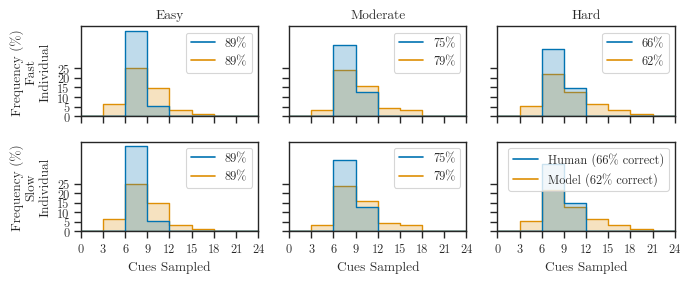

In [5]:
palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='ticks', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

fast_data = pd.read_pickle("data/1_results.pkl")
slow_data = pd.read_pickle("data/1_results.pkl")

fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=((7.07, 3)))
sns.histplot(data=fast_data.query("dP==0.4"), x='cues', hue='agent', bins=np.arange(0, 27, 3),
    palette=palette[:2], ax=axes[0][0], stat='percent', multiple='layer', element='step', linewidth=1)
sns.histplot(data=fast_data.query("dP==0.2"), x='cues', hue='agent', bins=np.arange(0, 27, 3),
    palette=palette[:2], ax=axes[0][1], stat='percent', multiple='layer', element='step', linewidth=1)
sns.histplot(data=fast_data.query("dP==0.1"), x='cues', hue='agent', bins=np.arange(0, 27, 3),
    palette=palette[:2], ax=axes[0][2], stat='percent', multiple='layer', element='step', linewidth=1)
axes[0][0].get_legend().remove()
axes[0][1].get_legend().remove()
axes[0][2].get_legend().remove()
easy_human = int(100*fast_data.query("dP==0.4 & agent=='human'")['correct'].mean())
moderate_human = int(100*fast_data.query("dP==0.2 & agent=='human'")['correct'].mean())
hard_human = int(100*fast_data.query("dP==0.1 & agent=='human'")['correct'].mean())
easy_model = int(100*fast_data.query("dP==0.4 & agent=='model'")['correct'].mean())
moderate_model = int(100*fast_data.query("dP==0.2 & agent=='model'")['correct'].mean())
hard_model = int(100*fast_data.query("dP==0.1 & agent=='model'")['correct'].mean())
sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{easy_human}%", ax=axes[0][0])
sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{moderate_human}%", ax=axes[0][1])
sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{hard_human}%", ax=axes[0][2])
sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{easy_model}%", ax=axes[0][0])
sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{moderate_model}%", ax=axes[0][1])
sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{hard_model}%", ax=axes[0][2])
axes[0][0].set(xlabel=None, title="Easy", ylabel="Frequency (%)\nFast\nIndividual", yticks=((0, 5, 10, 15, 20, 25)))
axes[0][1].set(xlabel=None, title="Moderate")
axes[0][2].set(xlabel=None, title="Hard")

sns.histplot(data=slow_data.query("dP==0.4"), x='cues', hue='agent', bins=np.arange(0, 27, 3),
    palette=palette[:2], ax=axes[1][0], stat='percent', multiple='layer', element='step', linewidth=1)
sns.histplot(data=slow_data.query("dP==0.2"), x='cues', hue='agent', bins=np.arange(0, 27, 3),
    palette=palette[:2], ax=axes[1][1], stat='percent', multiple='layer', element='step', linewidth=1)
sns.histplot(data=slow_data.query("dP==0.1"), x='cues', hue='agent', bins=np.arange(0, 27, 3),
    palette=palette[:2], ax=axes[1][2], stat='percent', multiple='layer', element='step', linewidth=1)
axes[1][0].get_legend().remove()
axes[1][1].get_legend().remove()
axes[1][2].get_legend().remove()
easy_human = int(100*slow_data.query("dP==0.4 & agent=='human'")['correct'].mean())
moderate_human = int(100*slow_data.query("dP==0.2 & agent=='human'")['correct'].mean())
hard_human = int(100*slow_data.query("dP==0.1 & agent=='human'")['correct'].mean())
easy_model = int(100*slow_data.query("dP==0.4 & agent=='model'")['correct'].mean())
moderate_model = int(100*slow_data.query("dP==0.2 & agent=='model'")['correct'].mean())
hard_model = int(100*slow_data.query("dP==0.1 & agent=='model'")['correct'].mean())
sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{easy_human}%", ax=axes[1][0])
sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{moderate_human}%", ax=axes[1][1])
sns.lineplot(x=[0],y=[0], color=palette[0], label=f"Human ({hard_human}% correct)", ax=axes[1][2])
sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{easy_model}%", ax=axes[1][0])
sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{moderate_model}%", ax=axes[1][1])
sns.lineplot(x=[0],y=[0], color=palette[1], label=f"Model ({hard_model}% correct)", ax=axes[1][2])
axes[1][0].set(xlabel='Cues Sampled', xticks=np.arange(0, 27, 3), xlim=((0, 24)), ylabel='Frequency (%)\nSlow\nIndividual')
axes[1][1].set(xlabel='Cues Sampled', xticks=np.arange(0, 27, 3), xlim=((0, 24)))
axes[1][2].set(xlabel='Cues Sampled', xticks=np.arange(0, 27, 3), xlim=((0, 24)))
plt.tight_layout()
fig.savefig(f"plots/extremes.svg")
fig.savefig(f"plots/extremes.png", dpi=600)